In [155]:
import pandas as pd 
import numpy as np

In [156]:
sales_df = pd.read_csv("advertising.csv")

In [157]:
Y = np.array(sales_df['Sales'])

In [158]:
X = np.array(sales_df['TV'])

In [159]:
X[0:5]

array([ 230.1,   44.5,   17.2,  151.5,  180.8])

# Normalize X and Y

In [160]:
Y = (Y - Y.mean())/Y.std()

In [161]:
X = (X - X.mean())/X.std()

# Random initialization of beta

In [162]:
import random

In [163]:

def initialize_betas() : 
    b_0 = random.random()
    b_1 = random.random()
    return b_0,b_1

In [164]:
b_0, b_1 = initialize_betas()

In [184]:
def predict_Y(b_0,b_1, X):
    return np.array([b_0 + b_1 * a for a in X])
    

In [166]:
y_hat = predict_Y(b_0,b_1,X)
y_hat[0:3]

array([ 1.20833183,  0.29089506,  0.15594882])

# Calculate cost (RMSE)

In [167]:
def get_cost(y, y_hat):
    y_resid = y - y_hat
    return np.sum(np.matmul(y_resid.T, y_resid))/ (2 * len(Y))

In [168]:
cost= get_cost(Y, y_hat)
cost

0.5766873924532312

In [169]:
def update_beta(b0,b1,y, y_hat,x,  alpha = 0.1):
    d_b0 = np.sum(y_hat - y) / (len(Y))
    b0 = b0 - alpha * d_b0 
    d_b1 = np.dot(y_hat - y, x) / (len(Y))
    b1 = b1 - alpha * d_b1
    return b0, b1

In [170]:
update_beta(b_0, b_1,Y, y_hat, X )

(0.71799431456986307, 0.45921276685505086)

# Gradient Descent Algorithm

In [171]:
num_iterations = 1000
alpha = 0.1
all_costs = []
all_b0 = []
all_b1 = []

b0 ,b1 = initialize_betas()
all_b0.append(b0)
all_b1.append(b1)

for each_iter in range(num_iterations):
    y_hat = predict_Y(b0,b1,X)
    current_cost = get_cost(Y, y_hat)
    b0,b1 = update_beta(b0, b1,Y, y_hat, X )
    
              
    all_costs.append(current_cost)
    all_b0.append(b0)
    all_b1.append(b1)
    #print('IterCost: ', each_iter, 'Cost: ', current_cost)
    
print('b_0: ', b0, 'b_1:',b1)
              


b_0:  -2.79232500026e-16 b_1: 0.782224424862


In [172]:
Y.size

200

In [173]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lmodel =lreg.fit(X.reshape(len(Y), 1), Y.reshape(len(Y), 1))

lmodel.intercept_

array([ -2.64282692e-16])

In [174]:
lmodel.coef_

array([[ 0.78222442]])

In [175]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

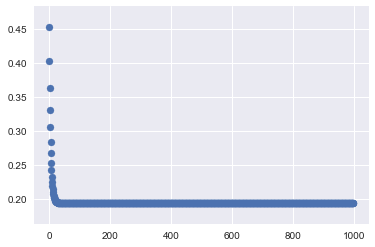

In [176]:
plt.scatter(range(num_iterations),all_costs)

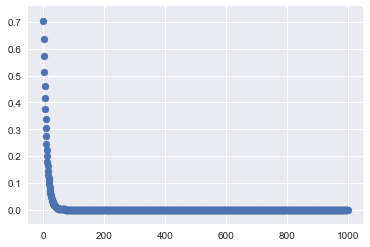

In [178]:
plt.scatter(range(num_iterations +1),all_b0)

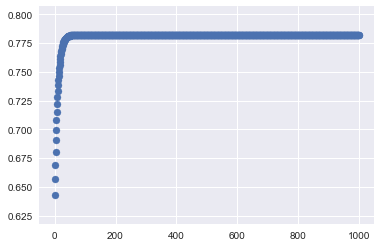

In [179]:
plt.scatter(range(num_iterations +1),all_b1)

## Add multiple explanatory variable

In [181]:
X2 = np.array(sales_df['Radio'])

In [182]:
X3 = np.array(sales_df['Newspaper'])

In [183]:
X2 = (X2 - X2.mean())/X2.std()
X3= (X3 - X3.mean())/X3.std()

In [ ]:
def predict_new_Y(b_0,b_1, X, X2,X3):
    return np.array([b_0 + b_1 * a for a in X])
   